In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import medfilt

In [61]:
def d_arg(image_in, sz=1):
    """
    Needs testing
    """
    image_filt = medfilt(image_in, kernel_size=sz)
    
    d_arg = np.zeros(image_filt.shape)
    for i in range(4):
        image_rot = np.rot90(image_filt, i)
        grad_x,grad_y = np.gradient(image_rot)
        theta = np.arctan2(grad_y, grad_x)
        theta_grad_y = np.gradient(theta, axis=1)
        
        d_arg += np.rot90(theta_grad_y, -i)
    
    d_arg_2 = np.square(d_arg);
    d_arg_final = d_arg_2 / np.amax(d_arg_2) * 255
    
    return d_arg_final

<Figure size 432x288 with 0 Axes>

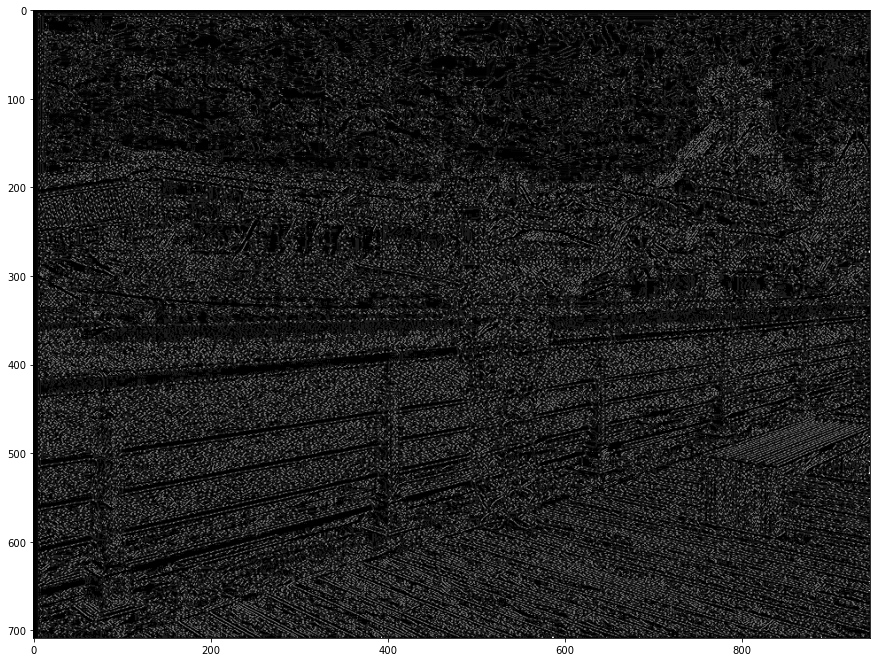

In [60]:
if __name__ == '__main__':
    # Load image
    plt.clf()
    image = cv2.imread('../Images/' + 'Liu10.PNG')
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Call method and show image
    image_out = d_arg(grayscale, 1)
    image_final = cv2.cvtColor(image_out.astype('uint8'), cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15,15))
    plt.imshow(image_final)
    plt.show()